##### Required Libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# LOAD THE DATA SET

In [238]:
diamond_df=pd.read_csv("C:\\Users\\bangarraju\\Downloads\\diamonds.csv") 

In [239]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [240]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [241]:
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# PERFORMING EDA

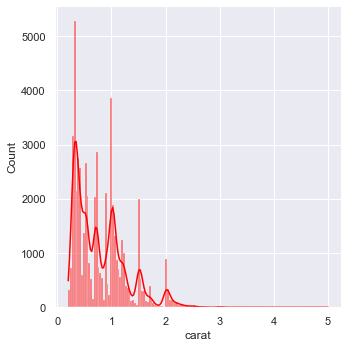

In [189]:
sns.displot(diamond_df["carat"], kde=True,color="red",)
plt.show()

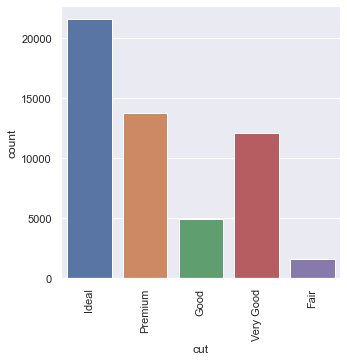

In [242]:
sns.countplot(x="cut", data=diamond_df)
plt.xticks(rotation = 90)
plt.show()

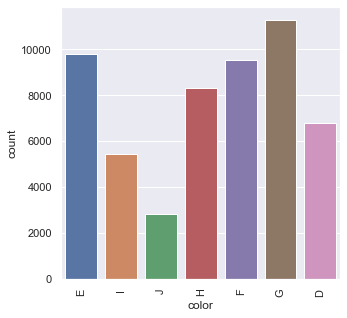

In [191]:
sns.countplot(x="color", data=diamond_df)
plt.xticks(rotation = 90)
plt.show()

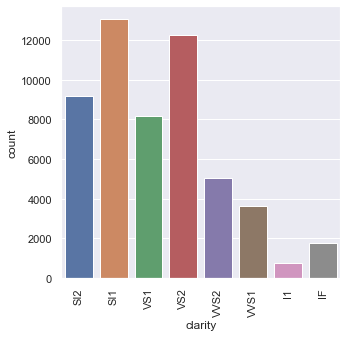

In [192]:
sns.countplot(x="clarity", data=diamond_df)
plt.xticks(rotation = 90)
plt.show()

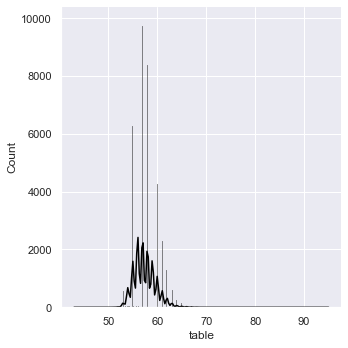

In [193]:
sns.displot(diamond_df["table"], kde=True,color="black",)
plt.show()

<AxesSubplot:xlabel='color'>

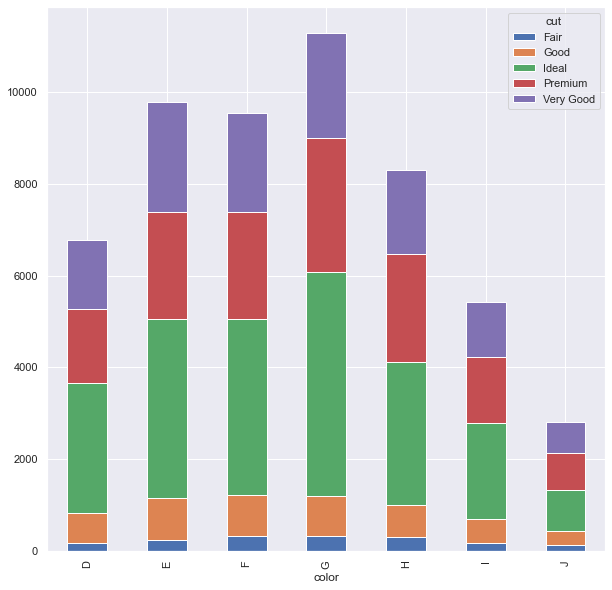

In [194]:
clarity_cut_table = pd.crosstab(index=diamond_df["color"], columns=diamond_df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

<AxesSubplot:xlabel='clarity'>

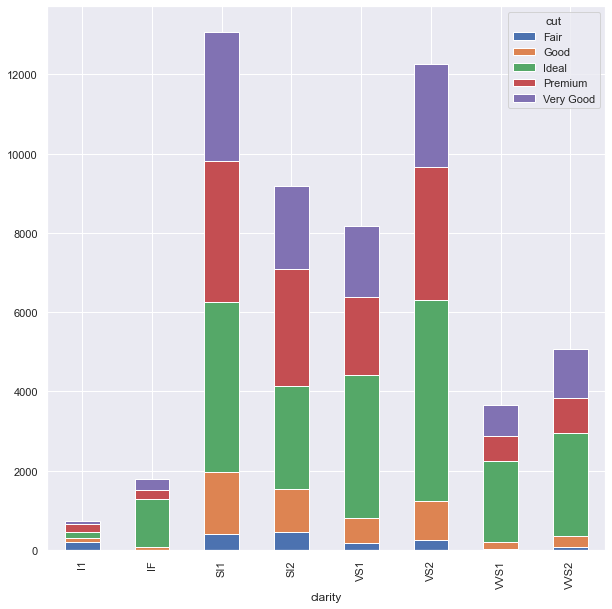

In [195]:
clarity_cut_table = pd.crosstab(index=diamond_df["clarity"], columns=diamond_df["cut"])

clarity_cut_table.plot(kind="bar", figsize=(10,10),stacked=True)

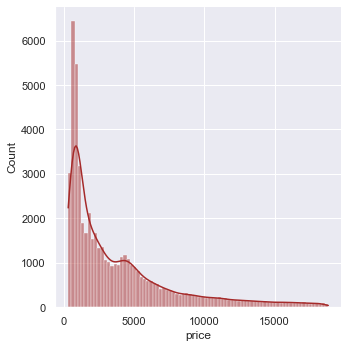

In [196]:
sns.displot(diamond_df["price"], kde=True,color="brown",)
plt.show()

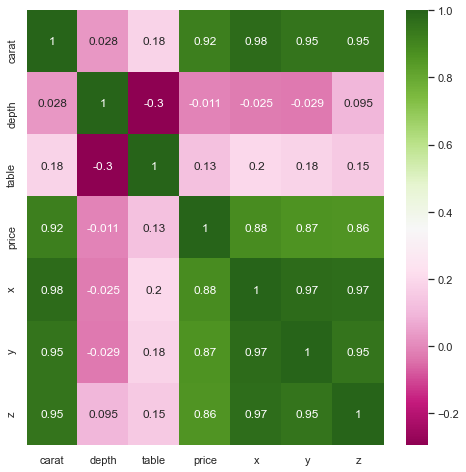

In [197]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(diamond_df.corr(), annot=True, cmap="PiYG")
plt.show()

Text(0.5, 1.0, 'Distribution of Diamond Price')

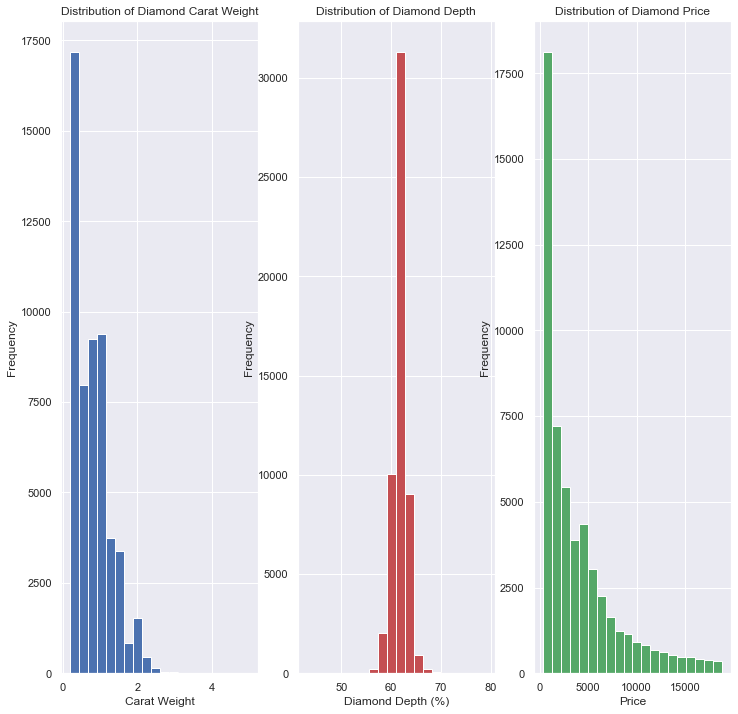

In [198]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(131)
plt.hist(diamond_df['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(132)
plt.hist(diamond_df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(133)
plt.hist(diamond_df['price'],bins=20,color='g')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

<AxesSubplot:xlabel='clarity', ylabel='price'>

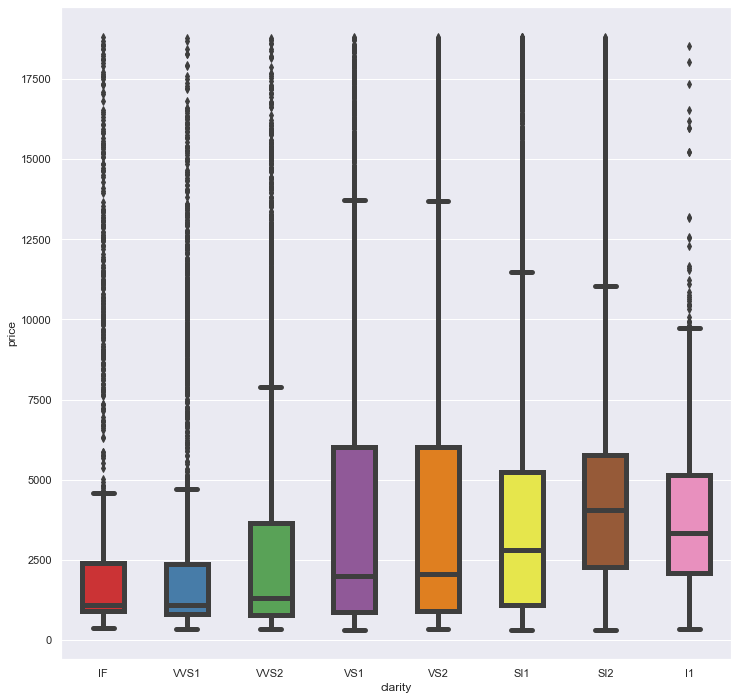

In [199]:
plt.figure(figsize=[12,12])

sns.boxplot(y='price',data=diamond_df,x='clarity',palette ='Set1', width =0.5,linewidth=5,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

<AxesSubplot:xlabel='price', ylabel='Density'>

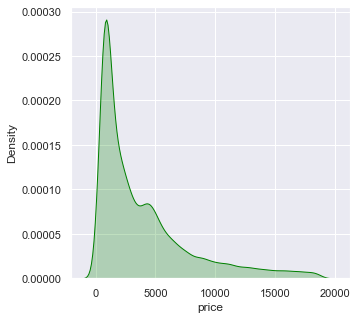

In [200]:
sns.set(rc={"figure.figsize":(5,5)})
sns.kdeplot(diamond_df["price"],shade=True,color="green")

# CHECKING THE NORMALITY

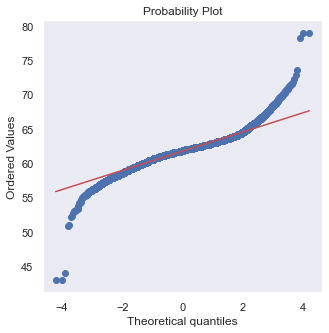

In [201]:
stats.probplot(diamond_df["depth"],dist="norm",plot=plt)
plt.grid()

# APPLYING BOXCOX

In [202]:
x_t,l = stats.boxcox(diamond_df["depth"])

In [203]:
print(l)

1.5617241391696204


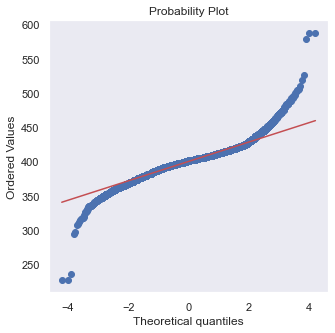

In [204]:
stats.probplot(x_t,dist="norm",plot=plt)
plt.grid()

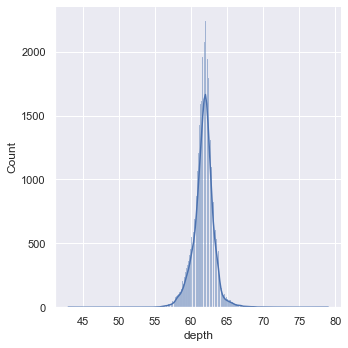

In [205]:
sns.displot(diamond_df["depth"],kde=True)

# IMPLEMENTATION OF KNN REGRESSION FROM SCRATCH WITH OUT USING SKLEARN LIBRARY

# HANDLING THE CATEGORICAL DATA

In [206]:
diamond_df["cut"]=diamond_df["cut"].map({"Ideal":1,"Premium":2,"Very Good":3,"Good":4,"Fair":5})
diamond_df["color"]=diamond_df["color"].map({"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7})
diamond_df["clarity"]=diamond_df["clarity"].map({"IF":1,"VVS1":2,"VVS2":3,"VS1":4,"VS2":5,"SI1":6,"SI2":7,"I1":8})

In [207]:
diamond_df.cut.unique()

array([1, 2, 4, 3, 5], dtype=int64)

In [208]:
diamond_df.clarity.unique()

array([7, 6, 4, 5, 3, 2, 8, 1], dtype=int64)

In [209]:
diamond_df.color.unique()

array([2, 6, 7, 5, 3, 4, 1], dtype=int64)

In [210]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,1,6,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,4,1,6,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,6,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,2,5,7,61.0,58.0,2757,6.15,6.12,3.74


# HANDLING THE NUMERICAL DATA BY NORMALIZATION

In [211]:
numer_norm=["carat","depth","table","x","y","z"]
diamond_df[numer_norm]=diamond_df[numer_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [212]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,1,2,7,0.513889,0.230769,326,0.367784,0.067572,0.076415
1,0.002079,2,2,6,0.466667,0.346154,326,0.362197,0.065195,0.072642
2,0.006237,4,2,4,0.386111,0.423077,327,0.377095,0.069100,0.072642
3,0.018711,2,6,5,0.538889,0.288462,334,0.391061,0.071817,0.082704
4,0.022869,4,7,7,0.563889,0.288462,335,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,1,1,6,0.494444,0.269231,2757,0.535382,0.097793,0.110063
53936,0.108108,4,1,6,0.558333,0.230769,2757,0.529795,0.097623,0.113522
53937,0.103950,3,1,6,0.550000,0.326923,2757,0.527002,0.096435,0.111950
53938,0.137214,2,5,7,0.500000,0.288462,2757,0.572626,0.103905,0.117610


In [213]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,1,2,7,0.513889,0.230769,326,0.367784,0.067572,0.076415
1,0.002079,2,2,6,0.466667,0.346154,326,0.362197,0.065195,0.072642
2,0.006237,4,2,4,0.386111,0.423077,327,0.377095,0.069100,0.072642
3,0.018711,2,6,5,0.538889,0.288462,334,0.391061,0.071817,0.082704
4,0.022869,4,7,7,0.563889,0.288462,335,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,1,1,6,0.494444,0.269231,2757,0.535382,0.097793,0.110063
53936,0.108108,4,1,6,0.558333,0.230769,2757,0.529795,0.097623,0.113522
53937,0.103950,3,1,6,0.550000,0.326923,2757,0.527002,0.096435,0.111950
53938,0.137214,2,5,7,0.500000,0.288462,2757,0.572626,0.103905,0.117610


In [214]:
diamond_df.shape

(53940, 10)

In [215]:
target=diamond_df["price"]
data=diamond_df.drop("price",axis=1)

In [216]:
data.shape

(53940, 9)

In [217]:
target.shape

(53940,)

# SPLITTING DATA FOR TRAINING AND TESTING

In [218]:
# shuffling data
#i=int((data.shape[0])*0.75)
##j=int((data.shape[0])*0.25)

#idx = np.hstack((np.ones(i), np.zeros(j))) # generate indices
#np.random.shuffle(idx) # shuffle to make training data and test data random

#x_train = data[idx == 1]
#x_test = data[idx == 0]

#y_train = target[idx == 1]
#y_test = target[idx == 0]

#print(x_train)
#print(x_test)

In [219]:
## with out shuffling data

In [220]:
train_split_percent = 0.75

In [221]:
size = data.shape[0]
x_train = data[:int(train_split_percent * size)]
x_test = data[int(train_split_percent * size):]
y_train = target[:int(train_split_percent * size)]
y_test = target[int(train_split_percent * size):] 

In [222]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(40455, 9) (13485, 9) (40455,) (13485,)


In [223]:
type(x_train)

pandas.core.frame.DataFrame

In [224]:
type(y_test)

pandas.core.series.Series

# CONVERTING PANDAS SERIES AND PANDAS DATA FRAME TO NUMPY ARRAY

In [225]:
x_train=x_train.to_numpy()

In [226]:
x_test=x_test.to_numpy()

In [227]:
y_train=y_train.to_numpy()

In [228]:
y_test=y_test.to_numpy()

# TRAINING AND PREDECTING USING NUMPY BROADCASTING

In [229]:
distance=np.zeros(y_test.shape)
y_pred=np.zeros(y_test.shape)
k=5
for i in range(len(x_test)): 
    distance=np.sqrt(np.sum((x_train-x_test[i])**2,axis=1 ))
    sort_value=(np.argsort(distance))  
    sort_val=sort_value[:k] 
    y_pred[i]=y_train[sort_val].mean()
print(y_pred)

[ 968.4 1039.6  897.2 ... 3007.  3314.  2873.8]


In [230]:
# distance=np.zeros(y_test.shape)
# y_pred=np.zeros(y_test.shape)
# k=3
# for i in range(len(x_test)):
#     distance = np.linalg.norm(x_train-x_test[i], axis=1)
#     sorting_indices = distance.argsort()[:k]
#     sorting_values= y_train[sorting_indices]
#     y_pred[i]= sorting_values.mean()
# print(y_pred)  
    

# EVALUATION OF MODEL USING METRICS

In [231]:
MSE = np.mean((y_test - y_pred)**2)
RMSE=np.sqrt(np.mean((y_test - y_pred)**2))
MAE=np.mean(np.abs(y_test - y_pred))
R2_score=1-(np.sum((y_test-y_pred)**2))/(np.sum((y_test-np.mean(y_train))**2))
print(MSE)
print(RMSE)
print(MAE)
print(R2_score*100)

579892.8301223583
761.5069468641493
595.8436336670375
93.482557283682


# KNN REGRESSION USING SKLEARN LIBRARY

# DATA PREPROCESSING

In [232]:
from sklearn.preprocessing import MinMaxScaler
standardized_data =MinMaxScaler().fit_transform(data)
print(standardized_data.shape)

(53940, 9)


# SPLITTING THE DATA

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(standardized_data,target,test_size=0.25,random_state=0)

# TRAINING THE MODEL

In [234]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(X_train,Y_train)

KNeighborsRegressor()

# PREDECTING

In [235]:
Y_pred = regressor.predict(X_test)

In [236]:
print(Y_pred)

[4664.4 6809.8 5458.2 ... 3383.2 2804.  1386.8]


# COMPARISION OF KNN REGRESSION FROM SCRATCH AND USING SKLEARN LIBRARY

# EVALUATION OF MODEL USING METRICS

In [178]:
from sklearn import metrics  
metrics.mean_squared_error(Y_test,Y_pred)

548201.5910329996

In [179]:
from sklearn import metrics  
metrics.r2_score(Y_test,Y_pred)*100

96.56761936597853

In [180]:
from sklearn import metrics  
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

740.406368849566

In [181]:
from sklearn import metrics  
metrics.mean_absolute_error(Y_test,Y_pred)  

369.32919540229886

# EVALUATION OF MODEL USING METRICS

In [182]:
MSE = np.mean((y_test - y_pred)**2)
RMSE=np.sqrt(np.mean((y_test - y_pred)**2))
MAE=np.mean(np.abs(y_test - y_pred))
R2_score=1-(np.sum((y_test-y_pred)**2))/(np.sum((y_test-np.mean(y_train))**2))
print(MSE)
print(RMSE)
print(MAE)
print(R2_score*100)

579892.8301223583
761.5069468641493
595.8436336670375
93.482557283682
